In [38]:
import pandas as pd

file_path = r"C:\Users\Carlos\Documents\BootCamp\Data Analyst\Week5\amz_uk_price_prediction_dataset.csv"
df = pd.read_csv(file_path)
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [5]:
crosstab_result = pd.crosstab(df['category'], df['isBestSeller'], normalize='index')

proportion_of_bestsellers = crosstab_result[True]
proportion_of_bestsellers = proportion_of_bestsellers.sort_values(ascending=False)

print(proportion_of_bestsellers)

category
Grocery                             0.058135
Smart Home Security & Lighting      0.057692
Health & Personal Care              0.057686
Mobile Phone Accessories            0.042471
Power & Hand Tools                  0.035339
                                      ...   
CD, Disc & Tape Players             0.000000
General Music-Making Accessories    0.000000
Snowboard Boots                     0.000000
Boxes & Organisers                  0.000000
eBook Readers & Accessories         0.000000
Name: True, Length: 296, dtype: float64


In [7]:
from scipy.stats import chi2_contingency

chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)

chi2_statistic, chi2_p_value

(3.9130707743346096, 1.0)

In [13]:
import numpy as np

contingency_table = pd.crosstab(df['category'], df['isBestSeller'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

n = contingency_table.sum().sum()
phi2 = chi2 / n
r, k = contingency_table.shape
phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
r_corrected = r - ((r-1)**2)/(n-1)
k_corrected = k - ((k-1)**2)/(n-1)
cramer_v = np.sqrt(phi2corr / min((k_corrected-1), (r_corrected-1)))
print("Cramér's V for association strength:", cramer_v)

Cramér's V for association strength: 0.12178835496344273


C:\Users\Carlos\AppData\Local\Temp\ipykernel_11612\2860290110.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories, palette="coolwarm")


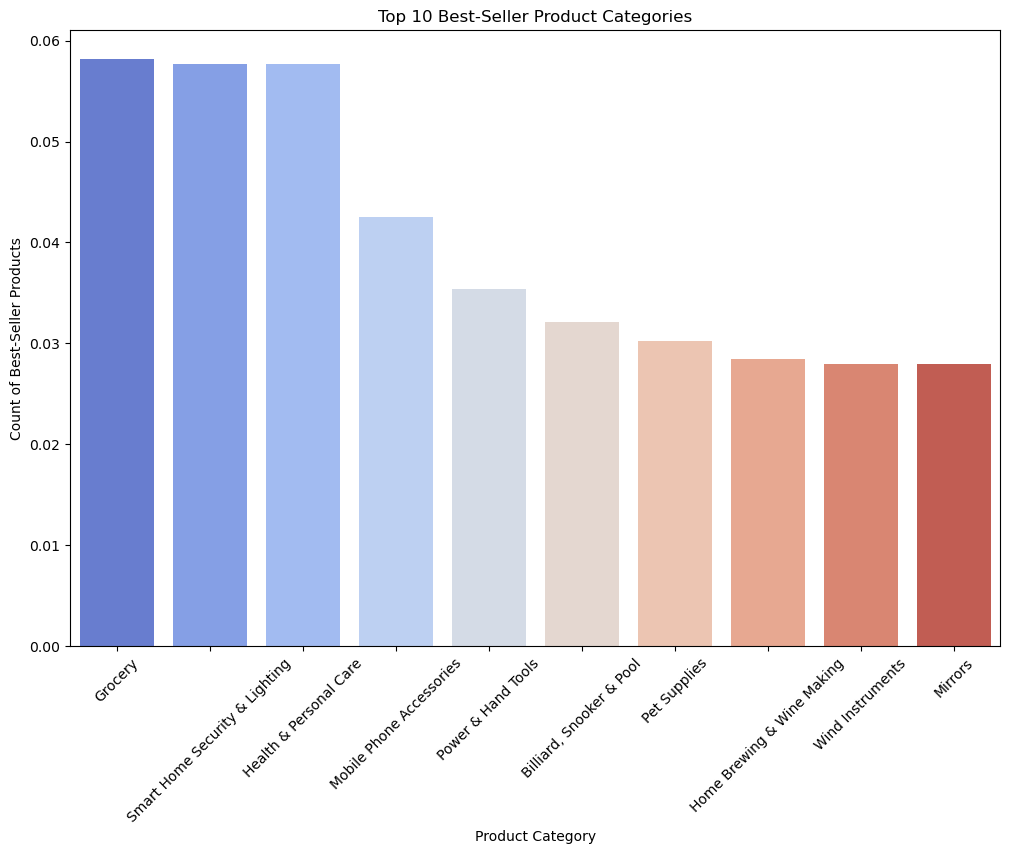

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

top_categories = crosstab_result[True].sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_categories.index, y=top_categories, palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel('Product Category')
plt.ylabel('Count of Best-Seller Products')
plt.title('Top 10 Best-Seller Product Categories')

plt.show()

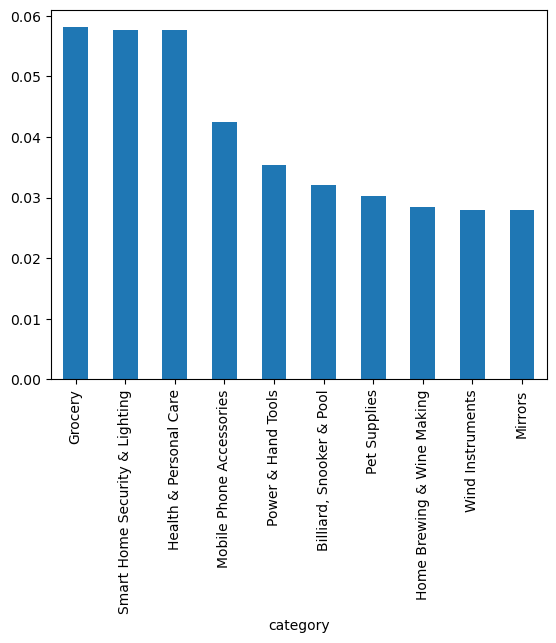

In [32]:
top_categories = crosstab_result[True].sort_values(ascending=False).head(10)
top_categories.plot(kind = "bar", stacked = True)
plt.show()

In [40]:
def tukeys_test_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    return outliers

data_series = df['price']
outliers = tukeys_test_outliers(data_series)
print(outliers)

10         139.00
19         164.99
25         149.99
28         289.00
31         199.99
            ...  
2443619    166.99
2443627    152.58
2443638    108.77
2443641    166.99
2443643    158.99
Name: price, Length: 327688, dtype: float64


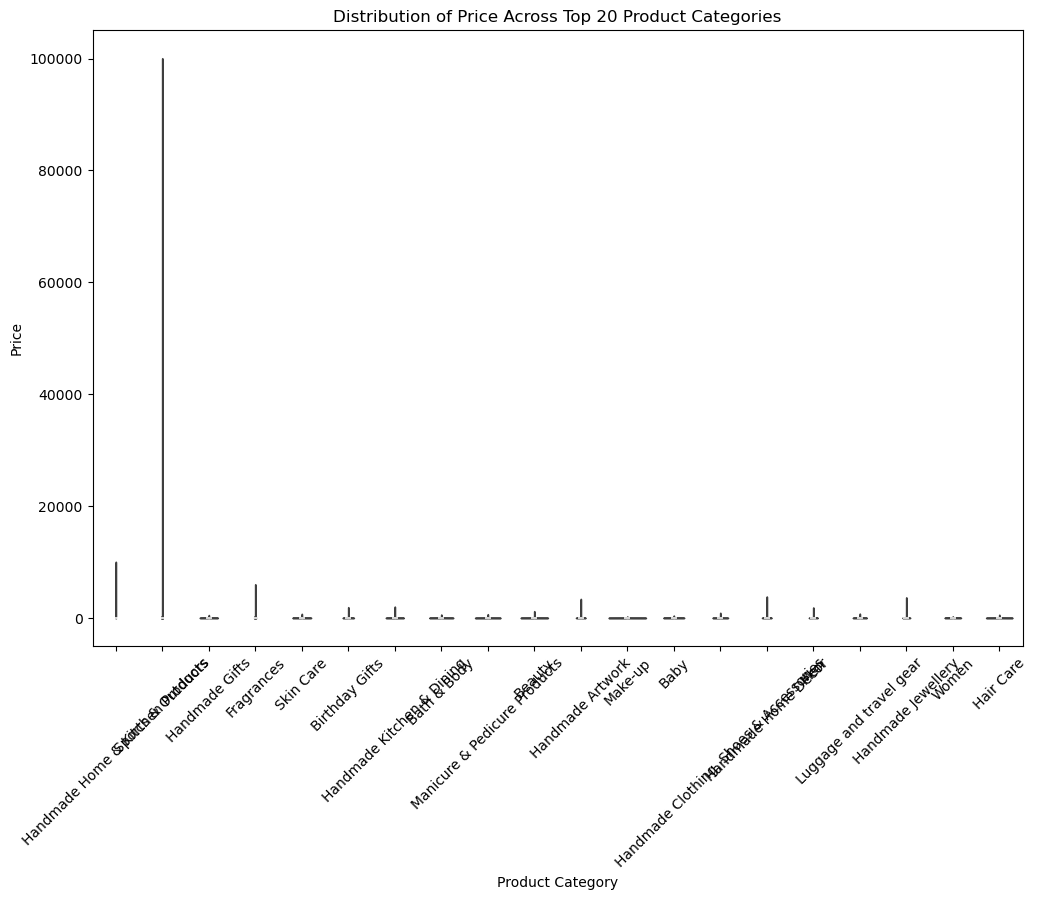

Product category with the highest median price: Laptops


In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

top_20_categories = df['category'].value_counts().nlargest(20).index
filtered_df = df[df['category'].isin(top_20_categories)]

plt.figure(figsize=(12, 8))
sns.violinplot(data=filtered_df, x='category', y='price')
plt.xticks(rotation=45)
plt.title('Distribution of Price Across Top 20 Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Price')
plt.show()

highest_median_price_category = df.groupby('category')['price'].median().idxmax()
print("Product category with the highest median price:", highest_median_price_category)

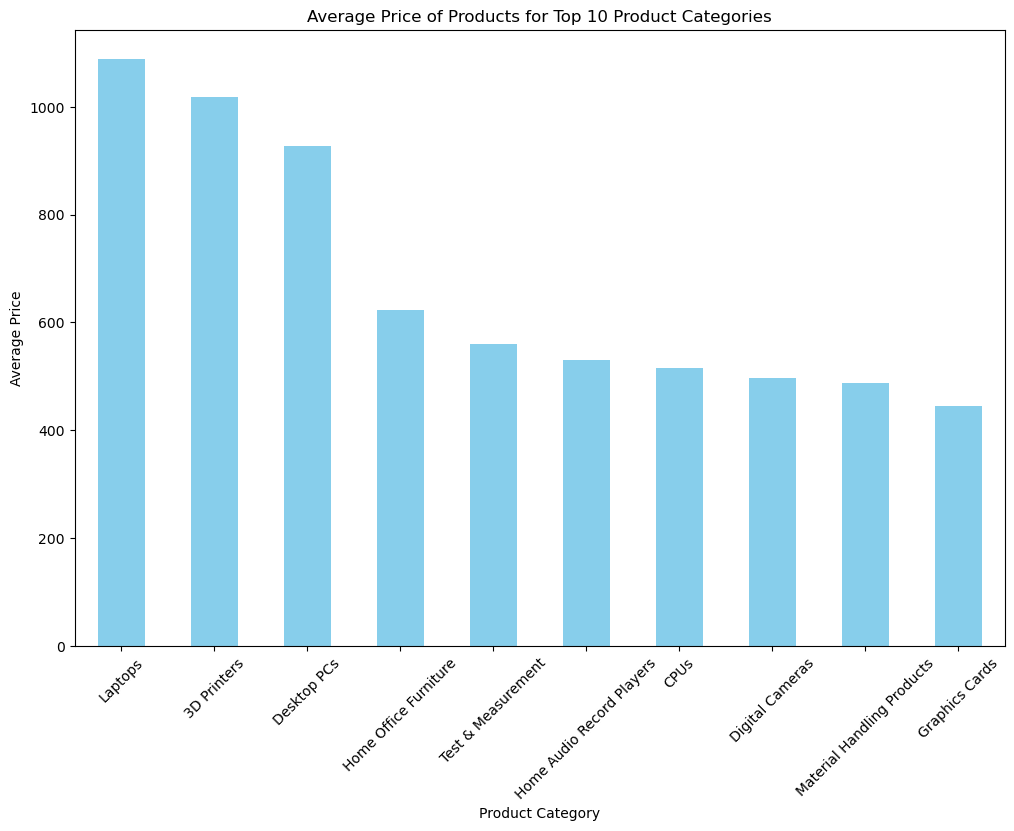

Category with the highest average price: Laptops


In [46]:
import matplotlib.pyplot as plt

average_price_per_category = df.groupby('category')['price'].mean()

top_10_categories = average_price_per_category.nlargest(10)

plt.figure(figsize=(12, 8))
top_10_categories.plot(kind='bar', color='skyblue')
plt.title('Average Price of Products for Top 10 Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

highest_average_price_category = average_price_per_category.idxmax()
print("Category with the highest average price:", highest_average_price_category)

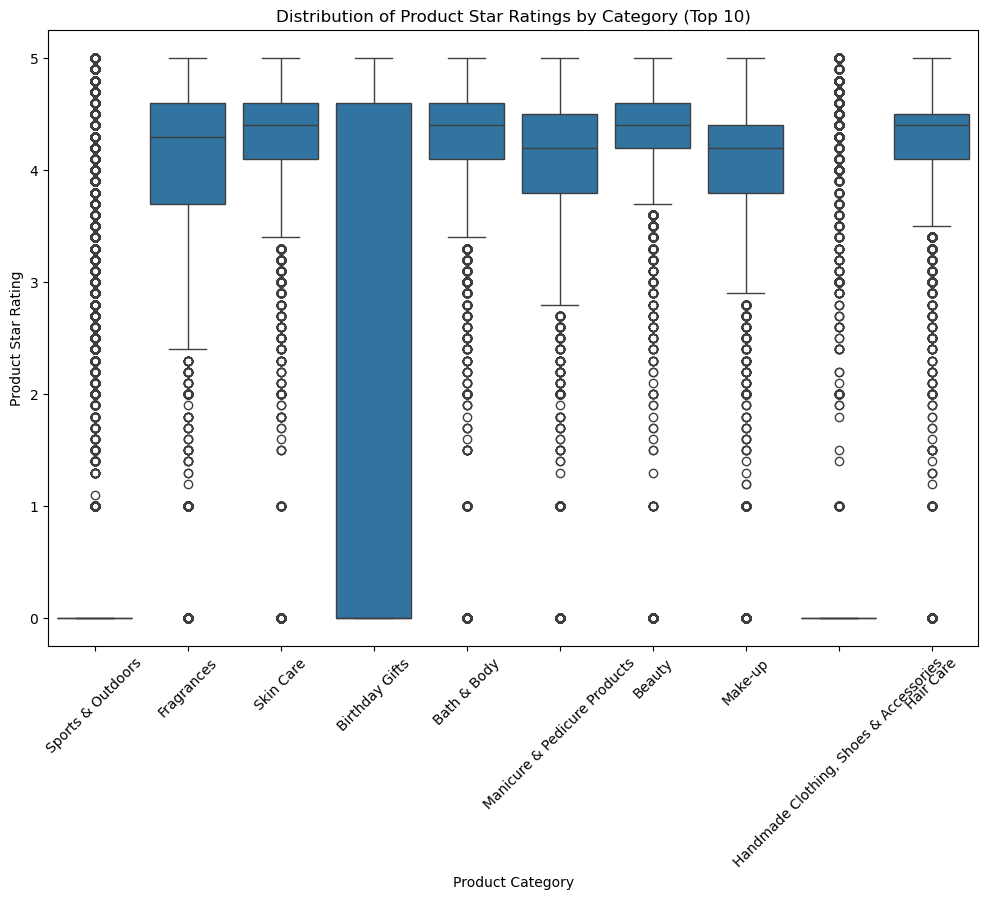

Category with the highest median star rating: Computer Memory


In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

top_10_categories = df['category'].value_counts().nlargest(10).index
filtered_df = df[df['category'].isin(top_10_categories)]

plt.figure(figsize=(12, 8))
sns.boxplot(data=filtered_df, x='category', y='stars')
plt.title('Distribution of Product Star Ratings by Category (Top 10)')
plt.xlabel('Product Category')
plt.ylabel('Product Star Rating')
plt.xticks(rotation=45)
plt.show()

highest_median_star_rating_category = df.groupby('category')['stars'].median().idxmax()
print("Category with the highest median star rating:", highest_median_star_rating_category)

In [52]:
correlation_coefficient = df["price"].corr(df["stars"], method = "pearson")

print("Correlation Coefficient between Price and Stars:", correlation_coefficient)

if abs(correlation_coefficient) >= 0.5:
    print("There is a strong correlation between product price and its rating.")
elif abs(correlation_coefficient) >= 0.3:
    print("There is a moderate correlation between product price and its rating.")
elif abs(correlation_coefficient) >= 0.1:
    print("There is a weak correlation between product price and its rating.")
else:
    print("There is no significant correlation between product price and its rating.")

Correlation Coefficient between Price and Stars: -0.1249067326214861
There is a weak correlation between product price and its rating.


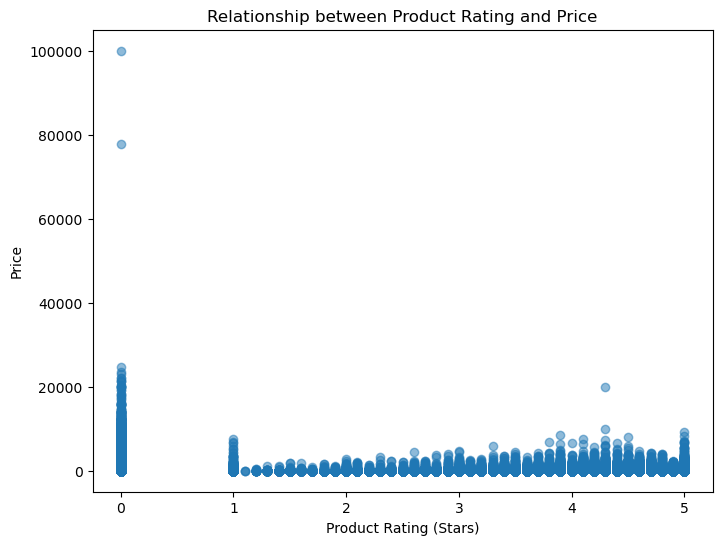

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df['stars'], df['price'], alpha=0.5)
plt.title('Relationship between Product Rating and Price')
plt.xlabel('Product Rating (Stars)')
plt.ylabel('Price')
plt.show()

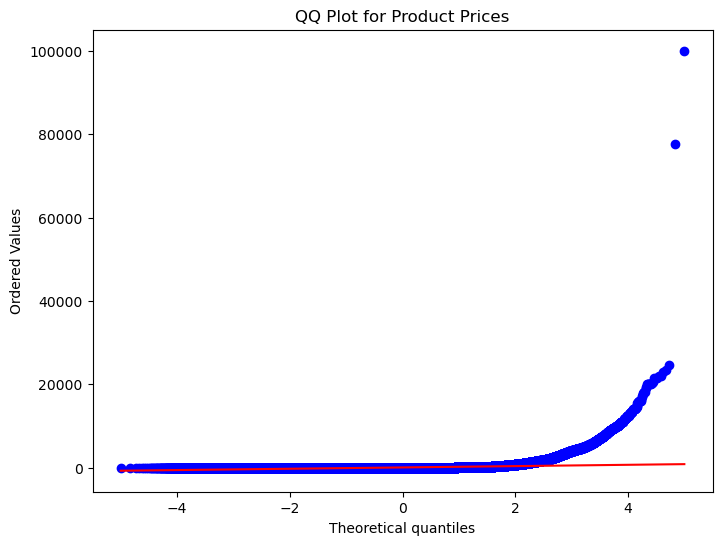

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import numpy as np

df['price'] = pd.to_numeric(df['price'], errors='coerce')
df = df.dropna(subset=['price'])

plt.figure(figsize=(8, 6))
stats.probplot(df['price'], dist="norm", plot=plt)
plt.title('QQ Plot for Product Prices')
plt.show()

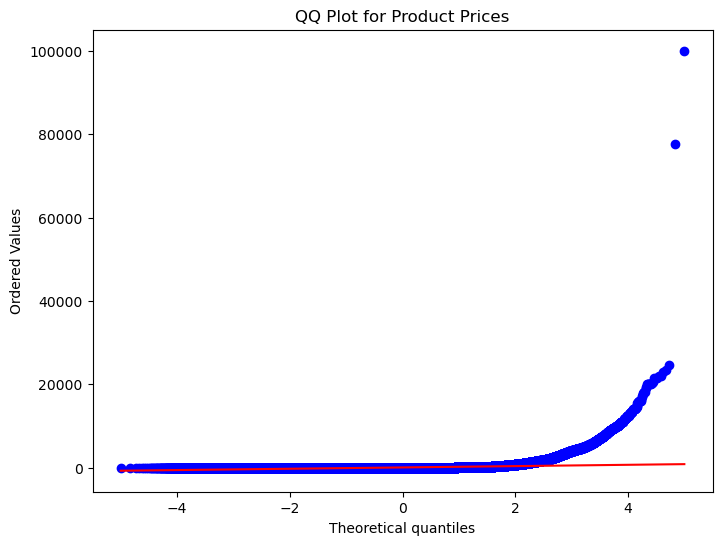

In [58]:
import scipy.stats as stats
import numpy as np

plt.figure(figsize=(8, 6))
stats.probplot(df['price'], dist="norm", plot=plt)
plt.title('QQ Plot for Product Prices')
plt.show()

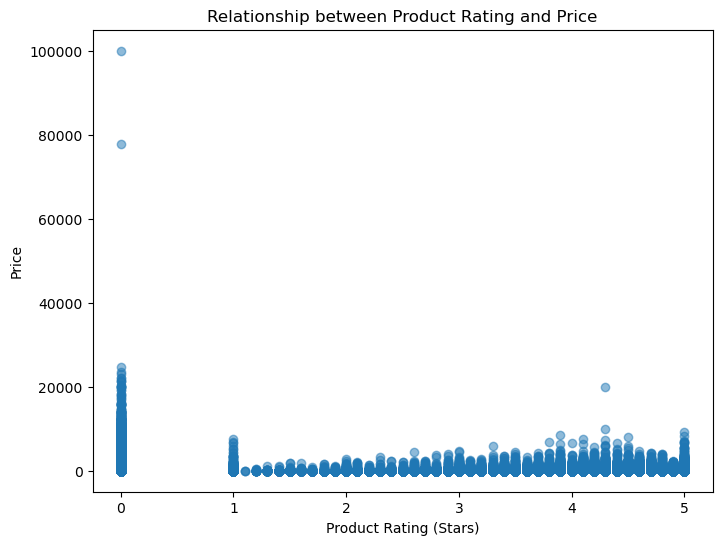

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df['stars'], df['price'], alpha=0.5)
plt.title('Relationship between Product Rating and Price')
plt.xlabel('Product Rating (Stars)')
plt.ylabel('Price')
plt.show()